# APPLIED DATA SCIENCE CAPSTONE | FINAL PROJECT
# <font color = "blue"> Choose the Neighborhood To Live In Bogota, Colombia Based on Foursquare Venues

![Bogota.jpg](attachment:Bogota.jpg)

### INTRODUCTION

Bogota is a city with a population of ten million people, including metropolitn area. It has 81 postal codes, which makes it difficult to choose where to live, in case you dont know someone. This project purpose is to give insights of venues from the different neighborhoods in bogota, make a clustering, and be able to choose where to live based on what usually people look for.

### BOGOTA SAFETY INSIGHTS

First information from Bogota site was taken, where safety data was available in pdf. It was neccesary to take that info out and place it in hurtos.csv file

In [5]:
import pandas as pd
hurtos = pd.read_csv("hurtos.csv")
hurtos_top5 = hurtos.sort_values("2020 YTD", ascending = False).head()
hurtos_top5

,LOCALIDAD,2020 YTD
8,KENNEDY,3710
14,SUBA,3460
6,ENGATIVA,3396
4,CHAPINERO,2717
18,USAQUEN,2713


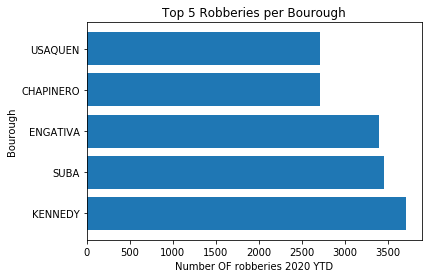

In [6]:
import matplotlib.pyplot as plt
plt.barh(hurtos_top5.LOCALIDAD, hurtos_top5["2020 YTD"])
plt.xlabel("Number OF robberies 2020 YTD")
plt.ylabel("Bourough")
plt.title("Top 5 Robberies per Bourough")
plt.show()

In [7]:
hurtos.LOCALIDAD.count()

20

There are 20 Boroughs in Bogota, called localidades.

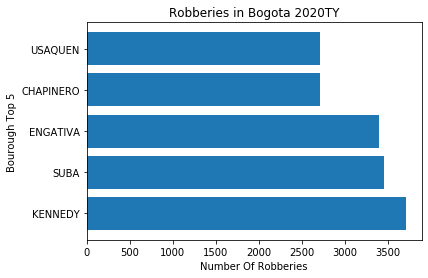

In [8]:
import matplotlib.pyplot as plt

plt.barh(hurtos_top5.LOCALIDAD, hurtos_top5["2020 YTD"])
plt.title("Robberies in Bogota 2020TY")
plt.xlabel("Number Of Robberies")
plt.ylabel("Bourough Top 5")
plt.show()

The top 5 of cases of robbery year to date 2020 are Kennedy, Suba, Engativa, Chapinero and Usaquen. Even though it is noticeable that the difference between the top 3 and the next two is material.

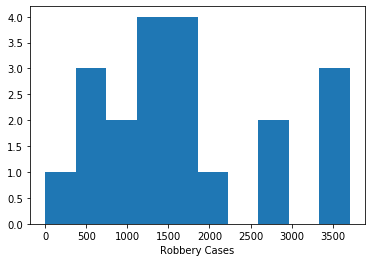

In [9]:
plt.hist(hurtos["2020 YTD"])
plt.xlabel("Robbery Cases")
plt.show()

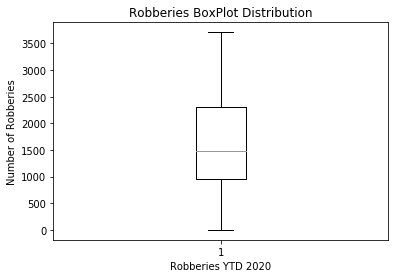

In [10]:
plt.boxplot(hurtos["2020 YTD"])
plt.xlabel("Robberies YTD 2020")
plt.ylabel("Number of Robberies")
plt.title("Robberies BoxPlot Distribution")
plt.show()

### BOGOTA CLOROPETH MAP | ROBBERIES

In [11]:
#!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [12]:
url = "https://datosabiertos.bogota.gov.co/dataset/856cb657-8ca3-4ee8-857f-37211173b1f8/resource/497b8756-0927-4aee-8da9-ca4e32ca3a8a/download/loca.geojson"
import urllib.request, json 
with urllib.request.urlopen(url) as url1:
    data = json.loads(url1.read().decode())

In [13]:
bog_map = folium.Map(location=[4.60971,-74.08175], zoom_start=10,width=1000,height=700)

bog_map.choropleth(
    geo_data=data,
    data=hurtos,
    columns=['LOCALIDAD', '2020 YTD'],
    key_on='feature.properties.LocNombre',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in Bogota'
)

bog_map

### BOGOTA POPULATION INSIGHTS

In [14]:
poblacion = pd.read_html("https://es.wikipedia.org/wiki/Anexo:Localidades_de_Bogot%C3%A1")[0]
poblacion.head()

,Nº,Localidad,Códigos Postales,Superficie km²[2]​,Población[3]​,Densidad hab/km²
0,1,Usaquén,110111-110151,65.31,501 999,7 686.4
1,2,Chapinero,110211-110231,38.15,139 701,3 661.88
2,3,Santa Fe,110311-110321,45.17,110 048,2 436.3
3,4,San Cristóbal,110411-110441,49.09,404 697,8 243.98
4,5,Usme,110511-110571,215.06,457 302,2 126.39


In [15]:
poblacion.columns = ["NO","LOCALIDAD", "POSTAL", "SUPERFICIE_KM2", "POBLACION", "DENSIDAD_HABXKM2"]

In [16]:
poblacion.head()

,NO,LOCALIDAD,POSTAL,SUPERFICIE_KM2,POBLACION,DENSIDAD_HABXKM2
0,1,Usaquén,110111-110151,65.31,501 999,7 686.4
1,2,Chapinero,110211-110231,38.15,139 701,3 661.88
2,3,Santa Fe,110311-110321,45.17,110 048,2 436.3
3,4,San Cristóbal,110411-110441,49.09,404 697,8 243.98
4,5,Usme,110511-110571,215.06,457 302,2 126.39


In [17]:
poblacion.dtypes

NO                    int64
LOCALIDAD            object
POSTAL               object
SUPERFICIE_KM2      float64
POBLACION            object
DENSIDAD_HABXKM2     object
dtype: object

## BOGOTA BOUROUGHS TOP 5 BY AREA [KM2]

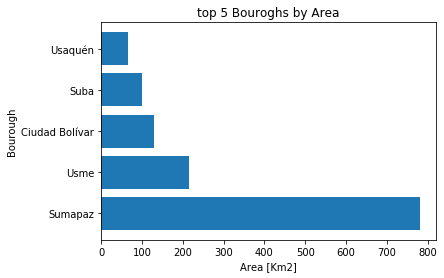

In [19]:
pob2=poblacion.sort_values("SUPERFICIE_KM2", ascending=False).head()
plt.barh(pob2["LOCALIDAD"], pob2.SUPERFICIE_KM2)
plt.xlabel("Area [Km2]")
plt.ylabel("Bourough")
plt.title("top 5 Bouroghs by Area")
plt.show()

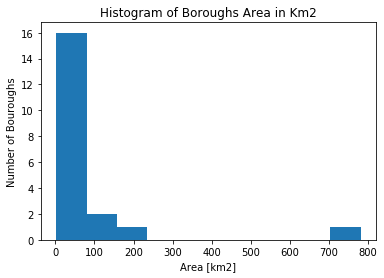

In [22]:
plt.hist(poblacion["SUPERFICIE_KM2"])
plt.xlabel("Area [km2]")
plt.ylabel("Number of Bouroughs")
plt.title("Histogram of Boroughs Area in Km2")
plt.show()

In [27]:
pob2[["LOCALIDAD","SUPERFICIE_KM2"]].head()

,LOCALIDAD,SUPERFICIE_KM2
19,Sumapaz,780.96
4,Usme,215.06
18,Ciudad Bolívar,130.00
10,Suba,100.56
0,Usaquén,65.31


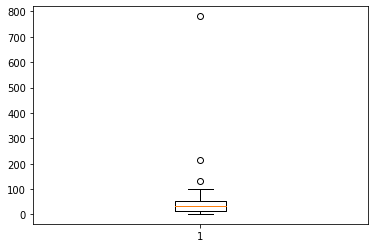

In [28]:
plt.boxplot(poblacion["SUPERFICIE_KM2"])
plt.show()

In [31]:
poblacion["SUPERFICIE_KM2"].mean()

81.8285

In [32]:
poblacion["SUPERFICIE_KM2"].std()

172.4244806857102

## BOGOTA BOUROUGHS TOP 5 BY DENSITY

In [33]:
poblacion["DENSIDAD_HABXKM2"] = poblacion["DENSIDAD_HABXKM2"].str.replace("\xa0","").astype("float")

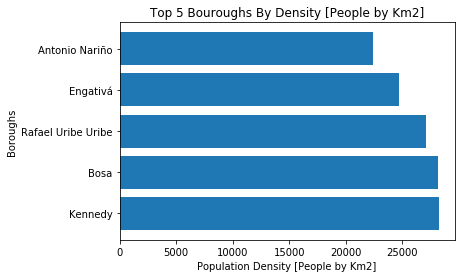

In [34]:
pob3 = poblacion.sort_values("DENSIDAD_HABXKM2",ascending=False).head()
plt.barh(pob3.LOCALIDAD, pob3["DENSIDAD_HABXKM2"])
plt.xlabel("Population Density [People by Km2]")
plt.ylabel("Boroughs")
plt.title("Top 5 Bouroughs By Density [People by Km2]")
plt.show()

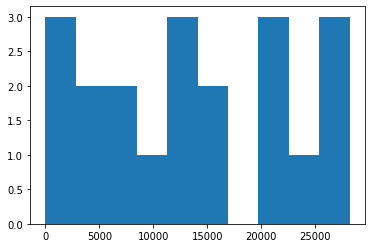

In [37]:
plt.hist(poblacion["DENSIDAD_HABXKM2"])
plt.show()

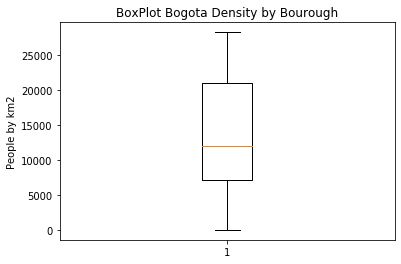

The mean Density by km2 is: 13863.878499999997
The median Density by km2 is: 11987.84
The max Density by km2 is: 28205.31
The min Density by km2 is: 8.36


In [47]:
plt.boxplot(poblacion["DENSIDAD_HABXKM2"])
plt.ylabel("People by km2")
plt.title("BoxPlot Bogota Density by Bourough")
plt.show()
print("The mean Density by km2 is:",poblacion["DENSIDAD_HABXKM2"].mean())
print("The median Density by km2 is:", poblacion["DENSIDAD_HABXKM2"].median())
print("The max Density by km2 is:", poblacion["DENSIDAD_HABXKM2"].max())
print("The min Density by km2 is:", poblacion["DENSIDAD_HABXKM2"].min())

In [48]:
pob3[["LOCALIDAD","DENSIDAD_HABXKM2"]]

,LOCALIDAD,DENSIDAD_HABXKM2
7,Kennedy,28205.31
6,Bosa,28126.91
17,Rafael Uribe Uribe,27060.44
9,Engativá,24723.52
14,Antonio Nariño,22372.12


In [49]:
poblacion["pob"] = poblacion["DENSIDAD_HABXKM2"]*poblacion["SUPERFICIE_KM2"].astype("float")

In [50]:
poblacion

,NO,LOCALIDAD,POSTAL,SUPERFICIE_KM2,POBLACION,DENSIDAD_HABXKM2,pob
0,1,Usaquén,110111-110151,65.31,501 999,7686.40,5.019988e+05
1,2,Chapinero,110211-110231,38.15,139 701,3661.88,1.397007e+05
2,3,Santa Fe,110311-110321,45.17,110 048,2436.30,1.100477e+05
3,4,San Cristóbal,110411-110441,49.09,404 697,8243.98,4.046970e+05
4,5,Usme,110511-110571,215.06,457 302,2126.39,4.573014e+05
5,6,Tunjuelito,110611-110621,9.91,199 430,20124.11,1.994299e+05
6,7,Bosa,110711-110741,23.93,673 077,28126.91,6.730770e+05
7,8,Kennedy,110811-110881,38.59,1 088 443,28205.31,1.088443e+06
8,9,Fontibón,110911-110931,33.28,394 648,11858.41,3.946479e+05
9,10,Engativá,111011-111071,35.88,887 080,24723.52,8.870799e+05


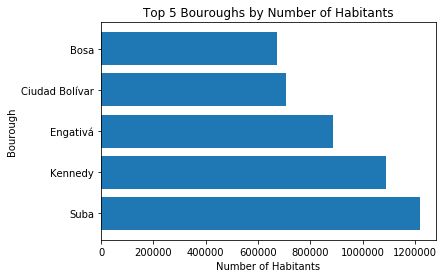

In [52]:
pob4 = poblacion.sort_values("pob", ascending=False).head()
plt.barh(pob4["LOCALIDAD"], pob4.pob)
plt.xlabel("Number of Habitants")
plt.ylabel("Bourough")
plt.title("Top 5 Bouroughs by Number of Habitants")
plt.show()

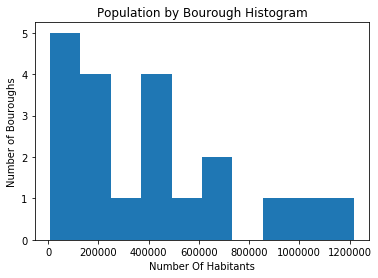

In [53]:
plt.hist(poblacion.pob)
plt.xlabel("Number Of Habitants")
plt.ylabel("Number of Bouroughs")
plt.title("Population by Bourough Histogram")
plt.show()

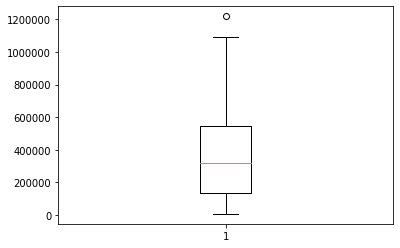

In [29]:
plt.boxplot(poblacion.pob)
plt.show()

In [30]:
Bogota_Total = pob4.pob.sum()
Bogota_Total

4574680.338

In [31]:
poblacion["pob"].mean()

402521.906245

In [32]:
poblacion["pob"].std()

350449.548882957

### Downloading and exploring Postal Codes Dataset:

The dataset was found using a csv file from postal codes web page. This dataset also is used in government pages:

In [33]:
bogota = pd.read_csv("http://visor.codigopostal.gov.co/472/visor/Codigos_Postales_Nacionales.csv")
bogota.head()

,noid,codigo_departamento,nombre_departamento,codigo_municipio,nombre_municipio,zona_postal,codigo_postal,limite_norte,limite_sur,limite_este,limite_oeste,tipo,barrios_contenidos_en_el_codigo_postal,veredas_contenidas_en_el_codigo_postal
0,3003,68,SANTANDER,68615,RIONEGRO,6875,687519,M. LA ESPE.- CACHI. Y RÍO CÁCHI.,M. LEBRIJA Y RÍO CÁCHI. DEL SUR,MUNICIPIO EL PLAYÓN,MUNICIPIO SABANA DE TORRES,Rural,Sin Informacion de Barrios,Caribe- Irlanda- Puerto Limón- Villa Eva- B...
1,3089,70,SUCRE,70204,COLOSO,7070,707030,KR 2,LIMITE URBANO,CL 1,LIMITE URBANO,Urbano,6 de Enero- Calle Nueva- Villa María,Sin Informacion de Veredas
2,183,5,ANTIOQUIA,5674,SAN VICENTE,540,54018,VIA SAN VICENTE - CONCEPCION,M. MARINILLA Y RÍO NEGRO,MUNICIPIO PEÑOL,MUNICIPIO GUARNE,Rural,Sin Informacion de Barrios,Compañia Abajo- El Canelo- El Carmelo- La Ca...
3,2089,44,LA GUAJIRA,44090,DIBULLA,4460,446007,MAR CARIBE,VÍA RIOHACHA-SANTA MARTA,MUNICIPIO RIOHACHA,VÍA CASA DE ALUMINIO-MAR CARIBE,Rural,Sin Informacion de Barrios,Sin Informacion de Veredas
4,877,15,BOYACA,15621,RONDON,1534,153420,LIMITE URBANO,LIMITE URBANO,LIMITE URBANO,LIMITE URBANO,Urbano,Sin Informacion de Barrios,Sin Informacion de Veredas


In [34]:
bogota.shape

(3681, 14)

Looks like this DataFrame is not only showing Bogota, but all Colombia, so I will filter to see only Bogota

In [35]:
bogota.nombre_departamento.unique()

array(['SANTANDER', 'SUCRE', 'ANTIOQUIA', 'LA GUAJIRA', 'BOYACA',
       'MAGDALENA', 'CUNDINAMARCA', 'META', 'TOLIMA', 'CAUCA',
       'ARCHIPIELAGO DE SAN ANDRES', 'CORDOBA', 'NARIÑO', 'HUILA',
       'BOGOTA D.C.', 'NORTE DE SANTANDER', 'CESAR', 'VALLE DEL CAUCA',
       'BOLIVAR', 'ATLANTICO', 'CHOCO', 'CALDAS', 'CASANARE', 'VAUPES',
       'CAQUETA', 'RISARALDA', 'QUINDIO', 'PUTUMAYO', 'AMAZONAS',
       'ARAUCA', 'VICHADA', 'GUAINIA', 'GUAVIARE'], dtype=object)

In [36]:
bogota_only = bogota[bogota["nombre_departamento"] =="BOGOTA D.C."]
bogota_only.head(20)

,noid,codigo_departamento,nombre_departamento,codigo_municipio,nombre_municipio,zona_postal,codigo_postal,limite_norte,limite_sur,limite_este,limite_oeste,tipo,barrios_contenidos_en_el_codigo_postal,veredas_contenidas_en_el_codigo_postal
24,519,11,BOGOTA D.C.,11001,LOCALIDAD TEUSAQUILLO,1113,111321,AC 63,DG 22A,AK 30,AK 68,Urbano,Acevedo Tejada- Campo Eucarístico- Campín Occi...,Sin Informacion de Veredas
83,468,11,BOGOTA D.C.,11001,LOCALIDAD CHAPINERO,1102,110231,AC 72,AC 39,LIMITE URBANO,AK 14,Urbano,Bosque Calderón- Cataluña- Chapinero Central- ...,Sin Informacion de Veredas
140,498,11,BOGOTA D.C.,11001,LOCALIDAD FONTIBON,1109,110931,AC 26,RIO FUCHA,AK 68,AK 86,Urbano,Bosque de Modelia- Capellanía- Ciudad Hayuelos...,Sin Informacion de Veredas
152,475,11,BOGOTA D.C.,11001,LOCALIDAD USME,1105,110511,TV 5C,AU LLANO,AK 51,CL 71A S,Urbano,Granada Sur- La Aurora- Marichuela- Nuevo San ...,Sin Informacion de Veredas
184,491,11,BOGOTA D.C.,11001,LOCALIDAD KENNEDY,1108,110841,AC 1 DE MAYO,AU SUR Y RIO TUNJUELITO,AK 68,CL 44 S,Urbano,Alqueria La Fragua- Alqueria La Fragua Norte- ...,Sin Informacion de Veredas
197,512,11,BOGOTA D.C.,11001,LOCALIDAD SUBA,1111,111161,CL 170,AC SUBA,KR 92,RIO BOGOTÁ,Urbano,Bosques de San Jorge- Campanella- El Pino- Las...,Sin Informacion de Veredas
247,517,11,BOGOTA D.C.,11001,LOCALIDAD BARRIOS UNIDOS,1112,111221,AC 72,AC 63,AK CARACAS - AK 14,AK 68,Urbano,Alcázares- Baquero- Benjamín Herrera- Colombia...,Sin Informacion de Veredas
335,535,11,BOGOTA D.C.,11001,LOCALIDAD CIUDAD BOLIVAR,1119,111961,DG 67A S Y CL 63 S,CL 97 S,RIO TUNJUELITO,KR 24,Urbano,Arabia- Bellavista Lucero Alto- Casa de Teja- ...,Sin Informacion de Veredas
415,496,11,BOGOTA D.C.,11001,LOCALIDAD FONTIBON,1109,110911,AC 63,AC 22,AK 86,RIO BOGOTÁ,Urbano,Aeropuerto El Dorado- Atahualpa- Brisas Aldea ...,Sin Informacion de Veredas
486,507,11,BOGOTA D.C.,11001,LOCALIDAD SUBA,1111,111121,AC SUBA,AK 68,AK SUBA,KR 91 Y CL 93,Urbano,Almirante Colon- Altos de Chozica- Andes Norte...,Sin Informacion de Veredas


In [37]:
bogota_only.shape

(81, 14)

In [38]:
bogota_only.columns

Index(['noid', 'codigo_departamento', 'nombre_departamento',
       'codigo_municipio', 'nombre_municipio', 'zona_postal', 'codigo_postal',
       'limite_norte', 'limite_sur', 'limite_este', 'limite_oeste', 'tipo',
       'barrios_contenidos_en_el_codigo_postal',
       'veredas_contenidas_en_el_codigo_postal'],
      dtype='object')

In [39]:
bogota_only2 = bogota_only[['nombre_municipio', 'codigo_postal','barrios_contenidos_en_el_codigo_postal']].reset_index(drop=True)

bogota_only2.head()

,nombre_municipio,codigo_postal,barrios_contenidos_en_el_codigo_postal
0,LOCALIDAD TEUSAQUILLO,111321,Acevedo Tejada- Campo Eucarístico- Campín Occi...
1,LOCALIDAD CHAPINERO,110231,Bosque Calderón- Cataluña- Chapinero Central- ...
2,LOCALIDAD FONTIBON,110931,Bosque de Modelia- Capellanía- Ciudad Hayuelos...
3,LOCALIDAD USME,110511,Granada Sur- La Aurora- Marichuela- Nuevo San ...
4,LOCALIDAD KENNEDY,110841,Alqueria La Fragua- Alqueria La Fragua Norte- ...


In [40]:
bogota_only2.shape

(81, 3)

In [41]:
columns_names = ["Borough","Postal Code","Neighborhood"]
bogota_only2.columns = columns_names
bogota_only2

,Borough,Postal Code,Neighborhood
0,LOCALIDAD TEUSAQUILLO,111321,Acevedo Tejada- Campo Eucarístico- Campín Occi...
1,LOCALIDAD CHAPINERO,110231,Bosque Calderón- Cataluña- Chapinero Central- ...
2,LOCALIDAD FONTIBON,110931,Bosque de Modelia- Capellanía- Ciudad Hayuelos...
3,LOCALIDAD USME,110511,Granada Sur- La Aurora- Marichuela- Nuevo San ...
4,LOCALIDAD KENNEDY,110841,Alqueria La Fragua- Alqueria La Fragua Norte- ...
...,...,...,...
76,LOCALIDAD USME,110521,Alaska- Arrayanes I- Arrayanes V- Barranquilli...
77,LOCALIDAD SANTA FE,110321,El Dorado- El Guavio- El Rocío- Girardot- La C...
78,LOCALIDAD KENNEDY,110831,Cooperativa de Sub-Oficiales- Hipotecho- Hipot...
79,LOCALIDAD CHAPINERO,110211,La Esperanza- Páramo- Páramo I- Páramo II- Pár...


In [42]:
for i in range(int(bogota_only2.shape[0])):
    if bogota_only2.Neighborhood.iloc[i] == "Sin Informacion de Barrios":
        bogota_only2.Neighborhood.iloc[i] = bogota_only2.Borough.iloc[i]
bogota_only2.head()

/Users/MaAnSeGo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Borough,Postal Code,Neighborhood
0,LOCALIDAD TEUSAQUILLO,111321,Acevedo Tejada- Campo Eucarístico- Campín Occi...
1,LOCALIDAD CHAPINERO,110231,Bosque Calderón- Cataluña- Chapinero Central- ...
2,LOCALIDAD FONTIBON,110931,Bosque de Modelia- Capellanía- Ciudad Hayuelos...
3,LOCALIDAD USME,110511,Granada Sur- La Aurora- Marichuela- Nuevo San ...
4,LOCALIDAD KENNEDY,110841,Alqueria La Fragua- Alqueria La Fragua Norte- ...


In [43]:
bogota_only2.dtypes

Borough         object
Postal Code      int64
Neighborhood    object
dtype: object

In [44]:
pip install geocoder #was necessary to install geocoder

Note: you may need to restart the kernel to use updated packages.


In [45]:
import geocoder # import geocoder

latitude = []
longitude = []

# loop until you get the coordinates
for j in bogota_only2["Postal Code"]:
    # initialize your variable to None   
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Bogota, Colombia'.format(j))
        lat_lng_coords = g.latlng
        latitude.append(lat_lng_coords[0])
        longitude.append(lat_lng_coords[1])

In [46]:
bogota_only2["Latitude"] = latitude
bogota_only2["Longitude"] = longitude

In [47]:
bogota_only2.head()

,Borough,Postal Code,Neighborhood,Latitude,Longitude
0,LOCALIDAD TEUSAQUILLO,111321,Acevedo Tejada- Campo Eucarístico- Campín Occi...,4.645420,-74.094400
1,LOCALIDAD CHAPINERO,110231,Bosque Calderón- Cataluña- Chapinero Central- ...,4.632283,-74.045805
2,LOCALIDAD FONTIBON,110931,Bosque de Modelia- Capellanía- Ciudad Hayuelos...,4.658656,-74.119585
3,LOCALIDAD USME,110511,Granada Sur- La Aurora- Marichuela- Nuevo San ...,4.496341,-74.130810
4,LOCALIDAD KENNEDY,110841,Alqueria La Fragua- Alqueria La Fragua Norte- ...,4.607185,-74.145908


In [48]:
bogota_only2.shape

(81, 5)

To understand what are the Boroughs, i checked the unique values that data has:

In [49]:
bogota_only2.Borough.unique()

array(['LOCALIDAD TEUSAQUILLO', 'LOCALIDAD CHAPINERO',
       'LOCALIDAD FONTIBON', 'LOCALIDAD USME', 'LOCALIDAD KENNEDY',
       'LOCALIDAD SUBA', 'LOCALIDAD BARRIOS UNIDOS',
       'LOCALIDAD CIUDAD BOLIVAR', 'LOCALIDAD BOSA',
       'LOCALIDAD SAN CRISTOBAL', 'LOCALIDAD RAFAEL URIBE URIBE',
       'LOCALIDAD ENGATIVA', 'LOCALIDAD PUENTE ARANDA',
       'LOCALIDAD SANTA FE', 'LOCALIDAD USAQUEN', 'LOCALIDAD SUMAPAZ',
       'LOCALIDAD CANDELARIA', 'LOCALIDAD ANTONIO NARIÑO',
       'LOCALIDAD LOS MARTIRES', 'LOCALIDAD TUNJUELITO'], dtype=object)

In [50]:
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [51]:
address = 'Bogota, CO'

geolocator = Nominatim(user_agent="bogota")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bogota are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bogota are 4.59808, -74.0760439.


Now lets do a map of Bogota:

In [52]:
# create map of Bogota using latitude and longitude values
map_bogota = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(bogota_only2['Latitude'], bogota_only2['Longitude'], bogota_only2['Borough'], bogota_only2['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bogota)  
    
map_bogota

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version

In [53]:
CLIENT_ID = '2BNBYYBCHSILUB3YTMXEHR3FICHOJO4CIT4SRSHK0GLJT3KT' # your Foursquare ID
CLIENT_SECRET = 'ZWOE1J5X0KZUEA21WT3MM2VHPSMLJKBAPMD4VTBOBPEE1NTE' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2BNBYYBCHSILUB3YTMXEHR3FICHOJO4CIT4SRSHK0GLJT3KT
CLIENT_SECRET:ZWOE1J5X0KZUEA21WT3MM2VHPSMLJKBAPMD4VTBOBPEE1NTE


#### Let's create a function to repeat the same process to all the neighborhoods in Bogota

In [54]:
import requests

def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called  Bogota_venues*.

In [55]:
bogota_venues = getNearbyVenues(names=bogota_only2['Neighborhood'],
                                   latitudes=bogota_only2['Latitude'],
                                   longitudes=bogota_only2['Longitude']
                                  )

Acevedo Tejada- Campo Eucarístico- Campín Occidental- Centro Administrativo Occ- Centro Nariño- Ciudad Salitre Nor-Oriental- Ciudad Salitre Sur-Oriental- Ciudad Universitaria- El Recuerdo- El Salitre- Gran América- La Esmeralda- Nicolás de Federman- Pablo
Bosque Calderón- Cataluña- Chapinero Central- Chapinero Norte- El Paraíso- Emaus- Granada- Hoya Teusaca- Ingemar- Ingemar Oriental- Ingemar Oriental I- Ingemar Oriental Rural- Juan XXIII- La Salle- Las Acacias- Marly- María Cristina- Pardo Rubio- Quinta C
Bosque de Modelia- Capellanía- Ciudad Hayuelos- El Vergel- Franco- Granjas de Techo- Interindustrial- La Esperanza Norte- La Esperanza Sur- Modelia- Modelia Occidental- Montevideo- Salitre Occidental- Santa Cecilia- Terminal de Transportes
Granada Sur- La Aurora- Marichuela- Nuevo San Andrés- San Juan Bautista- Santa Librada- Tunjuelito
Alqueria La Fragua- Alqueria La Fragua Norte- Boita- La Campiña- Las Delicias- Nueva York- Provivienda- Provivienda Occidental- Renania Urapanes- San

LOCALIDAD SUMAPAZ
Belén- Centro Administrativo- Egipto- La Catedral- La Concordia- Las Aguas- Parque Nacional Urbano- Santa Bárbara
Aguas Claras- Buenos Aires- Calvo Sur- El Triángulo- Hoya San Cristóbal- La María- Las Brisas- Los Laureles I- Modelo Sur- Molino Rural- Molinos de Oriente- Monte Carlo- Nariño Sur- Primero de Mayo- Quinta Ramos- San Cristóbal Sur- San Javier- Santa Ana S
Caracas- Ciudad Berna- Ciudad Jardín Sur- Eduardo Frey- La Fragua- La Fraguita- La Hortúa- Policarpa- Restrepo- Restrepo Occidental- San Antonio- Santander- Santander Sur- Sena- Sevilla- Villa Mayor Oriental
Acacias Usaquen- Bella Suiza- Bosque de Pinos I- Cedritos- Cedro Narvaez- Country Club- El Contador- Ginebra- La Calleja- La Carolina- Lisboa- Los Cedros- Los Cedros Oriental- Páramo Urbano I- San Gabriel Norte
El Tintal III- El Tintal IV- La Magdalena- Osorio II- Tintalá- Vereda El Tintal Rural- Vereda El Tintal Urbano
Brisas del Llano- Chapinerito- El Bosque- El Bosque Central- El Bosque Central I- 

In [56]:
bogota_venues.shape

(462, 7)

In [57]:
bogota_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Acevedo Tejada- Campo Eucarístico- Campín Occi...,4.64542,-74.0944,Hamburguesas El Corral,4.647428,-74.093518,Burger Joint
1,Acevedo Tejada- Campo Eucarístico- Campín Occi...,4.64542,-74.0944,Esturión,4.648340,-74.093999,Peruvian Restaurant
2,Acevedo Tejada- Campo Eucarístico- Campín Occi...,4.64542,-74.0944,Juan Valdez Café,4.643856,-74.091203,Coffee Shop
3,Acevedo Tejada- Campo Eucarístico- Campín Occi...,4.64542,-74.0944,Pescadero La Subienda,4.646799,-74.092956,Seafood Restaurant
4,Acevedo Tejada- Campo Eucarístico- Campín Occi...,4.64542,-74.0944,Star Pizza,4.649260,-74.092538,Pizza Place


In [58]:
bogota_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Abraham Lincoln- Area Artilleria- Parque El Tunal- San Benito- San Carlos- Tunal Oriental- Tunjuelito,1,1,1,1,1,1
Acacias Usaquen- Bella Suiza- Bosque de Pinos I- Cedritos- Cedro Narvaez- Country Club- El Contador- Ginebra- La Calleja- La Carolina- Lisboa- Los Cedros- Los Cedros Oriental- Páramo Urbano I- San Gabriel Norte,42,42,42,42,42,42
Acevedo Tejada- Campo Eucarístico- Campín Occidental- Centro Administrativo Occ- Centro Nariño- Ciudad Salitre Nor-Oriental- Ciudad Salitre Sur-Oriental- Ciudad Universitaria- El Recuerdo- El Salitre- Gran América- La Esmeralda- Nicolás de Federman- Pablo,12,12,12,12,12,12
Aeropuerto El Dorado- Atahualpa- Brisas Aldea Fontibón- Charco Rural- El Refugio- Ferrocaja Fontibón- La Cabaña Fontibón- Las Navetas- Pueblo Viejo- Puerta de Teja- San José de Fontibón- Versalles Fontibón,38,38,38,38,38,38
Alcalá- Alqueria- Autopista Sur- Galán- La Camelia- Ospina Pérez- Ospina Pérez Sur- Provivienda Norte- San Eusebio- Tejar,4,4,4,4,4,4
Alcázares Norte- Doce de Octubre- Entrerríos- Escuela Militar- Jorge Eliecer Gaitán- Juan XXIII- La Aurora- La Castellana- La Libertad- La Patria- Los Andes- Metrópolis- Once de Noviembre- Polo Club- Rionegro- San Felipe- San Fernando Occidental- Santa So,3,3,3,3,3,3
Alcázares- Baquero- Benjamín Herrera- Colombia- Concepción Norte- El Rosario- José Joaquín Vargas- La Esperanza- La Merced Norte- La Paz- Muequeta- Parque Distrital Salitre- Parque Popular Salitre- Popular Modelo- Quinta Mutis- Rafael Uribe- San Fernando-,7,7,7,7,7,7
Alfonso Lopez- Armenia- Banco central- Belalcázar- Campín- Chapinero Occidental- Estrella- Galerías- La Magdalena- La Soledad- Las Américas- Palermo- Quesada- San Luis- Santa Teresita- Teusaquillo,20,20,20,20,20,20
Almirante Colon- Altos de Chozica- Andes Norte- Ciudad Hunza- Club de Los Lagartos- Julio Flórez- Los Naranjos- Niza Norte- Niza Suba- Niza Sur- Potosí- Santa Rosa- Vereda Suba Naranjos,7,7,7,7,7,7


In [59]:
print('There are {} uniques categories.'.format(len(bogota_venues['Venue Category'].unique())))

There are 143 uniques categories.


##  Analyze Each Neighborhood

In [60]:
# one hot encoding
bogota_onehot = pd.get_dummies(bogota_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bogota_onehot['Neighborhood'] = bogota_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bogota_onehot.columns[-1]] + list(bogota_onehot.columns[:-1])
bogota_onehot = bogota_onehot[fixed_columns]

bogota_onehot.head()

,Wings Joint,Advertising Agency,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Steakhouse,Supermarket,Sushi Restaurant,Tennis Court,Theater,Theme Park,Theme Restaurant,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
bogota_onehot.shape

(462, 143)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [62]:
bogota_grouped = bogota_onehot.groupby('Neighborhood').mean().reset_index()
bogota_grouped

,Neighborhood,Wings Joint,Advertising Agency,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arcade,Arepa Restaurant,...,Steakhouse,Supermarket,Sushi Restaurant,Tennis Court,Theater,Theme Park,Theme Restaurant,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant
0,Abraham Lincoln- Area Artilleria- Parque El Tu...,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,Acacias Usaquen- Bella Suiza- Bosque de Pinos ...,0.02381,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.02381,...,0.000000,0.047619,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,Acevedo Tejada- Campo Eucarístico- Campín Occi...,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,Aeropuerto El Dorado- Atahualpa- Brisas Aldea ...,0.00000,0.00,0.026316,0.131579,0.026316,0.026316,0.00,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.026316,0.000000,0.000000,0.000000
4,Alcalá- Alqueria- Autopista Sur- Galán- La Cam...,0.00000,0.25,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
5,Alcázares Norte- Doce de Octubre- Entrerríos- ...,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
6,Alcázares- Baquero- Benjamín Herrera- Colombia...,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
7,Alfonso Lopez- Armenia- Banco central- Belalcá...,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
8,Almirante Colon- Altos de Chozica- Andes Norte...,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
9,Alqueria La Fragua- Alqueria La Fragua Norte- ...,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


#### Let's print each neighborhood along with the top 5 most common venues

In [64]:
num_top_venues = 5

for hood in bogota_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bogota_grouped[bogota_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abraham Lincoln- Area Artilleria- Parque El Tunal- San Benito- San Carlos- Tunal Oriental- Tunjuelito----
                venue  freq
0              Market   1.0
1              Museum   0.0
2  Mexican Restaurant   0.0
3   Mobile Phone Shop   0.0
4     Motorcycle Shop   0.0


----Acacias Usaquen- Bella Suiza- Bosque de Pinos I- Cedritos- Cedro Narvaez- Country Club- El Contador- Ginebra- La Calleja- La Carolina- Lisboa- Los Cedros- Los Cedros Oriental- Páramo Urbano I- San Gabriel Norte----
                  venue  freq
0  Fast Food Restaurant  0.10
1           Pizza Place  0.07
2  Gym / Fitness Center  0.05
3                   Bar  0.05
4                Bakery  0.05


----Acevedo Tejada- Campo Eucarístico- Campín Occidental- Centro Administrativo Occ- Centro Nariño- Ciudad Salitre Nor-Oriental- Ciudad Salitre Sur-Oriental- Ciudad Universitaria- El Recuerdo- El Salitre- Gran América- La Esmeralda- Nicolás de Federman- Pablo----
                       venue  freq
0                Piz

                  venue  freq
0           Bus Station  0.25
1  Fast Food Restaurant  0.25
2        Clothing Store  0.25
3                Market  0.25
4       Nature Preserve  0.00


----Calandaima- Campo Hermoso- El Paraíso- El Paraíso Bosa- Galán- Galán Rural- Osorio III- Patio Bonito- Patio Bonito II- Patio Bonito III- Tairona----
               venue  freq
0        Supermarket  0.33
1      Shopping Mall  0.33
2       Burger Joint  0.33
3             Museum  0.00
4  Mobile Phone Shop  0.00


----Caracas- Ciudad Berna- Ciudad Jardín Sur- Eduardo Frey- La Fragua- La Fraguita- La Hortúa- Policarpa- Restrepo- Restrepo Occidental- San Antonio- Santander- Santander Sur- Sena- Sevilla- Villa Mayor Oriental----
               venue  freq
0         Restaurant  0.18
1   Department Store  0.09
2     Sandwich Place  0.09
3         Food Truck  0.05
4  Mobile Phone Shop  0.05


----Casa Blanca Sur- Casablanca- Catalina- Catalina II- Class- El Carmelo- El Rubí- Gran Britalia- Gran Britalia I- Jacqu

#### Let's put that into a *pandas* dataframe

In [65]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [67]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bogota_grouped['Neighborhood']

for ind in np.arange(bogota_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bogota_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abraham Lincoln- Area Artilleria- Parque El Tu...,Market,Vegetarian / Vegan Restaurant,Cultural Center,Donut Shop,Dog Run,Dessert Shop,Department Store,Deli / Bodega,Cupcake Shop,Coworking Space
1,Acacias Usaquen- Bella Suiza- Bosque de Pinos ...,Fast Food Restaurant,Pizza Place,Burger Joint,Gym / Fitness Center,Bar,Plaza,Supermarket,Café,Bakery,Dessert Shop
2,Acevedo Tejada- Campo Eucarístico- Campín Occi...,Restaurant,Pizza Place,Latin American Restaurant,Burger Joint,Sandwich Place,Seafood Restaurant,South American Restaurant,Peruvian Restaurant,Coffee Shop,Construction & Landscaping
3,Aeropuerto El Dorado- Atahualpa- Brisas Aldea ...,Airport Lounge,Coffee Shop,Café,Donut Shop,Fried Chicken Joint,Cosmetics Shop,Pizza Place,Duty-free Shop,Gift Shop,Pub
4,Alcalá- Alqueria- Autopista Sur- Galán- La Cam...,Burger Joint,Advertising Agency,Fast Food Restaurant,Ice Cream Shop,Cultural Center,Dog Run,Dessert Shop,Department Store,Deli / Bodega,Cupcake Shop


## Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [69]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

bogota_grouped_clustering = bogota_grouped.drop('Neighborhood', axis = 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bogota_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [72]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

bogota_merged = bogota_only2

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
bogota_merged = bogota_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
bogota_merged.dropna(axis=0, inplace = True)

bogota_merged.head()

,Borough,Postal Code,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,LOCALIDAD TEUSAQUILLO,111321,Acevedo Tejada- Campo Eucarístico- Campín Occi...,4.645420,-74.094400,0.0,Restaurant,Pizza Place,Latin American Restaurant,Burger Joint,Sandwich Place,Seafood Restaurant,South American Restaurant,Peruvian Restaurant,Coffee Shop,Construction & Landscaping
2,LOCALIDAD FONTIBON,110931,Bosque de Modelia- Capellanía- Ciudad Hayuelos...,4.658656,-74.119585,0.0,Bar,Bakery,Theme Park,Furniture / Home Store,Cupcake Shop,Cultural Center,Donut Shop,Dog Run,Dessert Shop,Department Store
4,LOCALIDAD KENNEDY,110841,Alqueria La Fragua- Alqueria La Fragua Norte- ...,4.607185,-74.145908,0.0,Pizza Place,Grocery Store,American Restaurant,Athletics & Sports,Cultural Center,Dog Run,Dessert Shop,Department Store,Deli / Bodega,Cupcake Shop
6,LOCALIDAD BARRIOS UNIDOS,111221,Alcázares- Baquero- Benjamín Herrera- Colombia...,4.662365,-74.078465,0.0,Soccer Field,Clothing Store,Bakery,Auto Garage,Motorcycle Shop,Convenience Store,Cosmetics Shop,Coworking Space,Cultural Center,Cupcake Shop
8,LOCALIDAD FONTIBON,110911,Aeropuerto El Dorado- Atahualpa- Brisas Aldea ...,4.695895,-74.144576,0.0,Airport Lounge,Coffee Shop,Café,Donut Shop,Fried Chicken Joint,Cosmetics Shop,Pizza Place,Duty-free Shop,Gift Shop,Pub


In [73]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bogota_merged['Latitude'], bogota_merged['Longitude'], bogota_merged['Neighborhood'], bogota_merged['Cluster Labels'].astype('int')):
    #label = '{}, {}'.format(neighborhood, borough)
    #label = folium.Popup(label, parse_html=True)
    
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

In [74]:
bogota_merged.loc[bogota_merged['Cluster Labels'] == 0, bogota_merged.columns[[1] + list(range(5, bogota_merged.shape[1]))]]

,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,111321,0.0,Restaurant,Pizza Place,Latin American Restaurant,Burger Joint,Sandwich Place,Seafood Restaurant,South American Restaurant,Peruvian Restaurant,Coffee Shop,Construction & Landscaping
2,110931,0.0,Bar,Bakery,Theme Park,Furniture / Home Store,Cupcake Shop,Cultural Center,Donut Shop,Dog Run,Dessert Shop,Department Store
4,110841,0.0,Pizza Place,Grocery Store,American Restaurant,Athletics & Sports,Cultural Center,Dog Run,Dessert Shop,Department Store,Deli / Bodega,Cupcake Shop
6,111221,0.0,Soccer Field,Clothing Store,Bakery,Auto Garage,Motorcycle Shop,Convenience Store,Cosmetics Shop,Coworking Space,Cultural Center,Cupcake Shop
8,110911,0.0,Airport Lounge,Coffee Shop,Café,Donut Shop,Fried Chicken Joint,Cosmetics Shop,Pizza Place,Duty-free Shop,Gift Shop,Pub
9,111121,0.0,Golf Course,Bus Stop,Scenic Lookout,Mobile Phone Shop,Burger Joint,Bus Station,Other Great Outdoors,Convenience Store,Construction & Landscaping,Concert Hall
10,110721,0.0,Athletics & Sports,Department Store,Vegetarian / Vegan Restaurant,Duty-free Shop,Donut Shop,Dog Run,Dessert Shop,Deli / Bodega,Cupcake Shop,Cultural Center
15,110871,0.0,Shopping Mall,Burger Joint,Supermarket,Vegetarian / Vegan Restaurant,Cultural Center,Dog Run,Dessert Shop,Department Store,Deli / Bodega,Cupcake Shop
16,111821,0.0,Arepa Restaurant,Duty-free Shop,Donut Shop,Dog Run,Dessert Shop,Department Store,Deli / Bodega,Cupcake Shop,Cultural Center,Vegetarian / Vegan Restaurant
18,111621,0.0,Burger Joint,Advertising Agency,Fast Food Restaurant,Ice Cream Shop,Cultural Center,Dog Run,Dessert Shop,Department Store,Deli / Bodega,Cupcake Shop


In [75]:
bogota_merged.loc[bogota_merged['Cluster Labels'] == 1, bogota_merged.columns[[1] + list(range(5, bogota_merged.shape[1]))]]

,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,111131,1.0,Park,Drugstore,Donut Shop,Dog Run,Dessert Shop,Department Store,Deli / Bodega,Cupcake Shop,Cultural Center,Vegetarian / Vegan Restaurant
73,110621,1.0,Market,Vegetarian / Vegan Restaurant,Cultural Center,Donut Shop,Dog Run,Dessert Shop,Department Store,Deli / Bodega,Cupcake Shop,Coworking Space
75,111841,1.0,Park,Market,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Grocery Store


In [76]:
bogota_merged.loc[bogota_merged['Cluster Labels'] == 2, bogota_merged.columns[[1] + list(range(5, bogota_merged.shape[1]))]]

,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
65,110611,2.0,Restaurant,Vegetarian / Vegan Restaurant,Clothing Store,Dog Run,Dessert Shop,Department Store,Deli / Bodega,Cupcake Shop,Cultural Center,Coworking Space


In [77]:
bogota_merged.loc[bogota_merged['Cluster Labels'] == 3, bogota_merged.columns[[1] + list(range(5, bogota_merged.shape[1]))]]

,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,111151,3.0,Furniture / Home Store,Vegetarian / Vegan Restaurant,Cultural Center,Donut Shop,Dog Run,Dessert Shop,Department Store,Deli / Bodega,Cupcake Shop,Coworking Space


In [78]:
bogota_merged.loc[bogota_merged['Cluster Labels'] == 4, bogota_merged.columns[[1] + list(range(5, bogota_merged.shape[1]))]]

,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
45,110431,4.0,Building,Cocktail Bar,Donut Shop,Dog Run,Dessert Shop,Department Store,Deli / Bodega,Cupcake Shop,Cultural Center,Vegetarian / Vegan Restaurant


## After watching how clusters were made, I have noticed that it is better to make a narrow search, using only better known neighborhoods.

In [79]:
bogota_only = bogota[bogota["nombre_municipio"].isin(["LOCALIDAD USAQUEN","LOCALIDAD CHAPINERO"])]
bogota_only.head(20)

,noid,codigo_departamento,nombre_departamento,codigo_municipio,nombre_municipio,zona_postal,codigo_postal,limite_norte,limite_sur,limite_este,limite_oeste,tipo,barrios_contenidos_en_el_codigo_postal,veredas_contenidas_en_el_codigo_postal
83,468,11,BOGOTA D.C.,11001,LOCALIDAD CHAPINERO,1102,110231,AC 72,AC 39,LIMITE URBANO,AK 14,Urbano,Bosque Calderón- Cataluña- Chapinero Central- ...,Sin Informacion de Veredas
1025,461,11,BOGOTA D.C.,11001,LOCALIDAD USAQUEN,1101,110111,AC 127,AC 100,LIMITE URBANO,AU NORTE,Urbano,Escuela de Caballería I- Escuela de Caballería...,Sin Informacion de Veredas
1090,465,11,BOGOTA D.C.,11001,LOCALIDAD USAQUEN,1101,110151,LIMITE URBANO,CL 205,LIMITE URBANO,AU NORTE,Urbano,Torca I- Torca II- Torca Rural I- Torca Rural II,Sin Informacion de Veredas
1315,467,11,BOGOTA D.C.,11001,LOCALIDAD CHAPINERO,1102,110221,AC 100,AC 72,LIMITE URBANO,AU NORTE,Urbano,Antiguo Country- Bellavista- Chicó Norte- Chic...,Sin Informacion de Veredas
2128,462,11,BOGOTA D.C.,11001,LOCALIDAD USAQUEN,1101,110121,AC 147,AC 127,LIMITE URBANO,AU NORTE,Urbano,Acacias Usaquen- Bella Suiza- Bosque de Pinos ...,Sin Informacion de Veredas
2987,463,11,BOGOTA D.C.,11001,LOCALIDAD USAQUEN,1101,110131,AC 170,AC 147,LIMITE URBANO,AU NORTE,Urbano,Barrancas- Barrancas Norte- Barrancas Oriental...,Sin Informacion de Veredas
3593,466,11,BOGOTA D.C.,11001,LOCALIDAD CHAPINERO,1102,110211,VIA LA CALERA,LIMITE URBANO,M. LA CALERA Y LIMITE URBANO,LIMITE URBANO,Urbano,La Esperanza- Páramo- Páramo I- Páramo II- Pár...,Sin Informacion de Veredas
3675,464,11,BOGOTA D.C.,11001,LOCALIDAD USAQUEN,1101,110141,CL 205,AC 170,LIMITE URBANO,AU NORTE,Urbano,Buenavista- Canaima- El Cerezo- El Redil- El R...,Sin Informacion de Veredas


In [80]:
bogota_only2 = bogota_only[['nombre_municipio', 'codigo_postal','barrios_contenidos_en_el_codigo_postal']].reset_index(drop=True)

bogota_only2.head()

,nombre_municipio,codigo_postal,barrios_contenidos_en_el_codigo_postal
0,LOCALIDAD CHAPINERO,110231,Bosque Calderón- Cataluña- Chapinero Central- ...
1,LOCALIDAD USAQUEN,110111,Escuela de Caballería I- Escuela de Caballería...
2,LOCALIDAD USAQUEN,110151,Torca I- Torca II- Torca Rural I- Torca Rural II
3,LOCALIDAD CHAPINERO,110221,Antiguo Country- Bellavista- Chicó Norte- Chic...
4,LOCALIDAD USAQUEN,110121,Acacias Usaquen- Bella Suiza- Bosque de Pinos ...


In [81]:
columns_names = ["Borough","Postal Code","Neighborhood"]
bogota_only2.columns = columns_names
bogota_only2

,Borough,Postal Code,Neighborhood
0,LOCALIDAD CHAPINERO,110231,Bosque Calderón- Cataluña- Chapinero Central- ...
1,LOCALIDAD USAQUEN,110111,Escuela de Caballería I- Escuela de Caballería...
2,LOCALIDAD USAQUEN,110151,Torca I- Torca II- Torca Rural I- Torca Rural II
3,LOCALIDAD CHAPINERO,110221,Antiguo Country- Bellavista- Chicó Norte- Chic...
4,LOCALIDAD USAQUEN,110121,Acacias Usaquen- Bella Suiza- Bosque de Pinos ...
5,LOCALIDAD USAQUEN,110131,Barrancas- Barrancas Norte- Barrancas Oriental...
6,LOCALIDAD CHAPINERO,110211,La Esperanza- Páramo- Páramo I- Páramo II- Pár...
7,LOCALIDAD USAQUEN,110141,Buenavista- Canaima- El Cerezo- El Redil- El R...


In [82]:
for i in range(int(bogota_only2.shape[0])):
    if bogota_only2.Neighborhood.iloc[i] == "Sin Informacion de Barrios":
        bogota_only2.Neighborhood.iloc[i] = bogota_only2.Borough.iloc[i]
bogota_only2.head()

,Borough,Postal Code,Neighborhood
0,LOCALIDAD CHAPINERO,110231,Bosque Calderón- Cataluña- Chapinero Central- ...
1,LOCALIDAD USAQUEN,110111,Escuela de Caballería I- Escuela de Caballería...
2,LOCALIDAD USAQUEN,110151,Torca I- Torca II- Torca Rural I- Torca Rural II
3,LOCALIDAD CHAPINERO,110221,Antiguo Country- Bellavista- Chicó Norte- Chic...
4,LOCALIDAD USAQUEN,110121,Acacias Usaquen- Bella Suiza- Bosque de Pinos ...


In [83]:
import geocoder # import geocoder

latitude = []
longitude = []

# loop until you get the coordinates
for j in bogota_only2["Postal Code"]:
    # initialize your variable to None   
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Bogota, Colombia'.format(j))
        lat_lng_coords = g.latlng
        latitude.append(lat_lng_coords[0])
        longitude.append(lat_lng_coords[1])

In [84]:
bogota_only2["Latitude"] = latitude
bogota_only2["Longitude"] = longitude

In [85]:
bogota_only2.head()

,Borough,Postal Code,Neighborhood,Latitude,Longitude
0,LOCALIDAD CHAPINERO,110231,Bosque Calderón- Cataluña- Chapinero Central- ...,4.632283,-74.045805
1,LOCALIDAD USAQUEN,110111,Escuela de Caballería I- Escuela de Caballería...,4.691000,-74.033448
2,LOCALIDAD USAQUEN,110151,Torca I- Torca II- Torca Rural I- Torca Rural II,4.804580,-74.018480
3,LOCALIDAD CHAPINERO,110221,Antiguo Country- Bellavista- Chicó Norte- Chic...,4.617895,-74.021227
4,LOCALIDAD USAQUEN,110121,Acacias Usaquen- Bella Suiza- Bosque de Pinos ...,4.715295,-74.033909


In [86]:
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [87]:
address = 'Bogota, CO'

geolocator = Nominatim(user_agent="bogota")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bogota are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bogota are 4.59808, -74.0760439.


In [88]:
# create map of Bogota using latitude and longitude values
map_bogota = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(bogota_only2['Latitude'], bogota_only2['Longitude'], bogota_only2['Borough'], bogota_only2['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bogota)  
    
map_bogota

In [89]:
bogota_venues = getNearbyVenues(names=bogota_only2['Neighborhood'],
                                   latitudes=bogota_only2['Latitude'],
                                   longitudes=bogota_only2['Longitude']
                                  )


Bosque Calderón- Cataluña- Chapinero Central- Chapinero Norte- El Paraíso- Emaus- Granada- Hoya Teusaca- Ingemar- Ingemar Oriental- Ingemar Oriental I- Ingemar Oriental Rural- Juan XXIII- La Salle- Las Acacias- Marly- María Cristina- Pardo Rubio- Quinta C
Escuela de Caballería I- Escuela de Caballería II- Escuela de Infantería- Molinos Norte- Páramo- Páramo Urbano II- Páramo Urbano IV- Rincón del Chicó- San Patricio- Santa Ana- Santa Ana Occidental- Santa Bibiana- Santa Bárbara Central- Santa Bárbara Occid
Torca I- Torca II- Torca Rural I- Torca Rural II
Antiguo Country- Bellavista- Chicó Norte- Chicó Norte II Sector- Chicó Norte III Sector- El Bagazal- El Chicó- El Nogal- El Refugio- El Retiro- Espartillal- La Cabrera- Lago Gaitán- Los Rosales- Porciuncula- Seminario
Acacias Usaquen- Bella Suiza- Bosque de Pinos I- Cedritos- Cedro Narvaez- Country Club- El Contador- Ginebra- La Calleja- La Carolina- Lisboa- Los Cedros- Los Cedros Oriental- Páramo Urbano I- San Gabriel Norte
Barrancas-

In [90]:
bogota_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Acacias Usaquen- Bella Suiza- Bosque de Pinos I- Cedritos- Cedro Narvaez- Country Club- El Contador- Ginebra- La Calleja- La Carolina- Lisboa- Los Cedros- Los Cedros Oriental- Páramo Urbano I- San Gabriel Norte,42,42,42,42,42,42
Barrancas- Barrancas Norte- Barrancas Oriental- Bosque de Pinos- Bosque de Pinos III- Caobos Salazar- Cedro Salazar- El Toberín- Estrella del Norte- La Cita- La Liberia- La Pradera Norte- Las Margaritas- Las Orquídeas- San Cristóbal Norte- Santa Cecilia N,8,8,8,8,8,8
Buenavista- Canaima- El Cerezo- El Redil- El Rocío Norte- El Vervenal- Horizontes Norte- La Estrellita- La Estrellita I- La Granja Norte- La Uribe- Mirador del Norte- San Antonio Noroccidental- San Antonio Norte- San José de Usaquén- Tibabita- Tibabita I-,4,4,4,4,4,4
Escuela de Caballería I- Escuela de Caballería II- Escuela de Infantería- Molinos Norte- Páramo- Páramo Urbano II- Páramo Urbano IV- Rincón del Chicó- San Patricio- Santa Ana- Santa Ana Occidental- Santa Bibiana- Santa Bárbara Central- Santa Bárbara Occid,37,37,37,37,37,37
La Esperanza- Páramo- Páramo I- Páramo II- Páramo Urbano- Páramo Urbano III- San Isidro- San Isidro Rural- San Luis Alatos del Cabo,2,2,2,2,2,2


In [91]:
print('There are {} uniques categories.'.format(len(bogota_venues['Venue Category'].unique())))

There are 53 uniques categories.


In [92]:
# one hot encoding
bogota_onehot = pd.get_dummies(bogota_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bogota_onehot['Neighborhood'] = bogota_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bogota_onehot.columns[-1]] + list(bogota_onehot.columns[:-1])
bogota_onehot = bogota_onehot[fixed_columns]

bogota_onehot.head()

,Neighborhood,Arepa Restaurant,Asian Restaurant,Athletics & Sports,Bakery,Bar,Basketball Court,Big Box Store,Bike Rental / Bike Share,Burger Joint,...,Restaurant,Sandwich Place,Seafood Restaurant,Shopping Mall,Skating Rink,Soccer Field,Steakhouse,Supermarket,Sushi Restaurant,Wings Joint
0,Escuela de Caballería I- Escuela de Caballería...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Escuela de Caballería I- Escuela de Caballería...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Escuela de Caballería I- Escuela de Caballería...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Escuela de Caballería I- Escuela de Caballería...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Escuela de Caballería I- Escuela de Caballería...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
bogota_grouped = bogota_onehot.groupby('Neighborhood').mean().reset_index()
bogota_grouped

,Neighborhood,Arepa Restaurant,Asian Restaurant,Athletics & Sports,Bakery,Bar,Basketball Court,Big Box Store,Bike Rental / Bike Share,Burger Joint,...,Restaurant,Sandwich Place,Seafood Restaurant,Shopping Mall,Skating Rink,Soccer Field,Steakhouse,Supermarket,Sushi Restaurant,Wings Joint
0,Acacias Usaquen- Bella Suiza- Bosque de Pinos ...,0.02381,0.023810,0.02381,0.047619,0.047619,0.02381,0.02381,0.000000,0.047619,...,0.000000,0.02381,0.000000,0.023810,0.000,0.02381,0.000000,0.047619,0.000000,0.02381
1,Barrancas- Barrancas Norte- Barrancas Oriental...,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.125000,0.00000,0.000000,0.000000,0.125,0.00000,0.000000,0.125000,0.000000,0.00000
2,Buenavista- Canaima- El Cerezo- El Redil- El R...,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000,0.00000,0.000000,0.000000,0.000000,0.00000
3,Escuela de Caballería I- Escuela de Caballería...,0.00000,0.081081,0.00000,0.000000,0.054054,0.00000,0.00000,0.027027,0.000000,...,0.054054,0.00000,0.027027,0.054054,0.000,0.00000,0.081081,0.000000,0.027027,0.00000
4,La Esperanza- Páramo- Páramo I- Páramo II- Pár...,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000,0.00000,0.000000,0.000000,0.000000,0.00000


In [94]:
num_top_venues = 5

for hood in bogota_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bogota_grouped[bogota_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Acacias Usaquen- Bella Suiza- Bosque de Pinos I- Cedritos- Cedro Narvaez- Country Club- El Contador- Ginebra- La Calleja- La Carolina- Lisboa- Los Cedros- Los Cedros Oriental- Páramo Urbano I- San Gabriel Norte----
                  venue  freq
0  Fast Food Restaurant  0.10
1           Pizza Place  0.07
2          Burger Joint  0.05
3  Gym / Fitness Center  0.05
4                 Plaza  0.05


----Barrancas- Barrancas Norte- Barrancas Oriental- Bosque de Pinos- Bosque de Pinos III- Caobos Salazar- Cedro Salazar- El Toberín- Estrella del Norte- La Cita- La Liberia- La Pradera Norte- Las Margaritas- Las Orquídeas- San Cristóbal Norte- Santa Cecilia N----
                     venue  freq
0               Donut Shop  0.12
1  Health & Beauty Service  0.12
2              Supermarket  0.12
3             Skating Rink  0.12
4               Restaurant  0.12


----Buenavista- Canaima- El Cerezo- El Redil- El Rocío Norte- El Vervenal- Horizontes Norte- La Estrellita- La Estrellita I- La Granja 

In [95]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bogota_grouped['Neighborhood']

for ind in np.arange(bogota_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bogota_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Acacias Usaquen- Bella Suiza- Bosque de Pinos ...,Fast Food Restaurant,Pizza Place,Plaza,Supermarket,Gym / Fitness Center,Bakery,Bar,Burger Joint,Café,Dessert Shop
1,Barrancas- Barrancas Norte- Barrancas Oriental...,Supermarket,Flea Market,Health & Beauty Service,Skating Rink,Fast Food Restaurant,Restaurant,Donut Shop,Dessert Shop,Wings Joint,Coffee Shop
2,Buenavista- Canaima- El Cerezo- El Redil- El R...,Fast Food Restaurant,Market,Bus Station,Clothing Store,Wings Joint,Department Store,Fried Chicken Joint,French Restaurant,Flea Market,Fabric Shop
3,Escuela de Caballería I- Escuela de Caballería...,Asian Restaurant,Steakhouse,Hotel,French Restaurant,Coffee Shop,Shopping Mall,Bar,Restaurant,Pub,Grocery Store
4,La Esperanza- Páramo- Páramo I- Páramo II- Pár...,Mountain,Wings Joint,Coworking Space,Fried Chicken Joint,French Restaurant,Flea Market,Fast Food Restaurant,Fabric Shop,Drugstore,Donut Shop


In [96]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

bogota_grouped_clustering = bogota_grouped.drop('Neighborhood', axis = 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bogota_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 4, 2, 1, 0], dtype=int32)

In [97]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

bogota_merged = bogota_only2

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
bogota_merged = bogota_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
bogota_merged.dropna(axis=0, inplace = True)

bogota_merged.head()

,Borough,Postal Code,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,LOCALIDAD USAQUEN,110111,Escuela de Caballería I- Escuela de Caballería...,4.691000,-74.033448,1.0,Asian Restaurant,Steakhouse,Hotel,French Restaurant,Coffee Shop,Shopping Mall,Bar,Restaurant,Pub,Grocery Store
4,LOCALIDAD USAQUEN,110121,Acacias Usaquen- Bella Suiza- Bosque de Pinos ...,4.715295,-74.033909,3.0,Fast Food Restaurant,Pizza Place,Plaza,Supermarket,Gym / Fitness Center,Bakery,Bar,Burger Joint,Café,Dessert Shop
5,LOCALIDAD USAQUEN,110131,Barrancas- Barrancas Norte- Barrancas Oriental...,4.734640,-74.028726,4.0,Supermarket,Flea Market,Health & Beauty Service,Skating Rink,Fast Food Restaurant,Restaurant,Donut Shop,Dessert Shop,Wings Joint,Coffee Shop
6,LOCALIDAD CHAPINERO,110211,La Esperanza- Páramo- Páramo I- Páramo II- Pár...,4.667800,-74.025910,0.0,Mountain,Wings Joint,Coworking Space,Fried Chicken Joint,French Restaurant,Flea Market,Fast Food Restaurant,Fabric Shop,Drugstore,Donut Shop
7,LOCALIDAD USAQUEN,110141,Buenavista- Canaima- El Cerezo- El Redil- El R...,4.766152,-74.027775,2.0,Fast Food Restaurant,Market,Bus Station,Clothing Store,Wings Joint,Department Store,Fried Chicken Joint,French Restaurant,Flea Market,Fabric Shop


In [98]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bogota_merged['Latitude'], bogota_merged['Longitude'], bogota_merged['Neighborhood'], bogota_merged['Cluster Labels'].astype('int')):
    
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [99]:
bogota_merged.loc[bogota_merged['Cluster Labels'] == 0, bogota_merged.columns[[1] + list(range(5, bogota_merged.shape[1]))]]

,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,110211,0.0,Mountain,Wings Joint,Coworking Space,Fried Chicken Joint,French Restaurant,Flea Market,Fast Food Restaurant,Fabric Shop,Drugstore,Donut Shop


In [100]:
bogota_merged.loc[bogota_merged['Cluster Labels'] == 1, bogota_merged.columns[[1] + list(range(5, bogota_merged.shape[1]))]]

,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,110111,1.0,Asian Restaurant,Steakhouse,Hotel,French Restaurant,Coffee Shop,Shopping Mall,Bar,Restaurant,Pub,Grocery Store


In [101]:
bogota_merged.loc[bogota_merged['Cluster Labels'] == 2, bogota_merged.columns[[1] + list(range(5, bogota_merged.shape[1]))]]

,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,110141,2.0,Fast Food Restaurant,Market,Bus Station,Clothing Store,Wings Joint,Department Store,Fried Chicken Joint,French Restaurant,Flea Market,Fabric Shop


In [102]:
bogota_merged.loc[bogota_merged['Cluster Labels'] == 3, bogota_merged.columns[[1] + list(range(5, bogota_merged.shape[1]))]]

,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,110121,3.0,Fast Food Restaurant,Pizza Place,Plaza,Supermarket,Gym / Fitness Center,Bakery,Bar,Burger Joint,Café,Dessert Shop


In [103]:
bogota_merged.loc[bogota_merged['Cluster Labels'] == 4, bogota_merged.columns[[1] + list(range(5, bogota_merged.shape[1]))]]

,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,110131,4.0,Supermarket,Flea Market,Health & Beauty Service,Skating Rink,Fast Food Restaurant,Restaurant,Donut Shop,Dessert Shop,Wings Joint,Coffee Shop
